# Dynamic Average Analysis of Loss, Packet Size, Accuracy from Tensorboard Events

## Imports

In [114]:
import os
from collections import defaultdict
import glob
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from fault_tolerant_ml.utils.tf_utils import load_events

rc('text', usetex=True)

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in events from tensorboard

### Fashion Mnist

In [11]:
list_output[0:2]

['/Users/sashlinreddy/Downloads/masters/tf/fashion-mnist-latest/32-1-1-0-0-0.0-100-0.0-1-20-0-0-0',
 '/Users/sashlinreddy/Downloads/masters/tf/fashion-mnist-latest/32-1-1-0-0-0.0-100-0.0-0-20-0-0-0']

In [17]:
dataset = 'fashion-mnist'
tf_dir = f"/Users/sashlinreddy/Downloads/masters/tf/{dataset}-latest/*"
list_output = (glob.glob(tf_dir))

keys = [
    'loss-master', 'msg-size',
    'test-accuracy-master', 'train-accuracy-master'
]

In [31]:
df = load_events(list_output, keys, child_dir=f'master/{dataset}')

Skipping /Users/sashlinreddy/Downloads/masters/tf/fashion-mnist-latest/128-1-1-0-0-0.0-100-0.0-3-1-1-1-1/master/fashion-mnist
Skipping /Users/sashlinreddy/Downloads/masters/tf/fashion-mnist-latest/128-1-1-0-0-0.0-100-0.0-2-1-0-1-0/master/fashion-mnist
Skipping /Users/sashlinreddy/Downloads/masters/tf/fashion-mnist-latest/32-1-1-0-0-0.0-100-0.0-0-1-0-0-0/master/fashion-mnist


In [33]:
df.loc[:, 'Dataset'] = dataset

In [34]:
df.head()

,loss-master,msg-size,test-accuracy-master,train-accuracy-master,Name,Dataset
0,0.183447,4.647,0.7574,0.773433,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,fashion-mnist
1,0.167993,4.647,0.7862,0.798150,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,fashion-mnist
2,0.161724,4.647,0.7972,0.808883,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,fashion-mnist
3,0.158087,4.647,0.8055,0.816550,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,fashion-mnist
4,0.155682,4.647,0.8093,0.821400,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,fashion-mnist


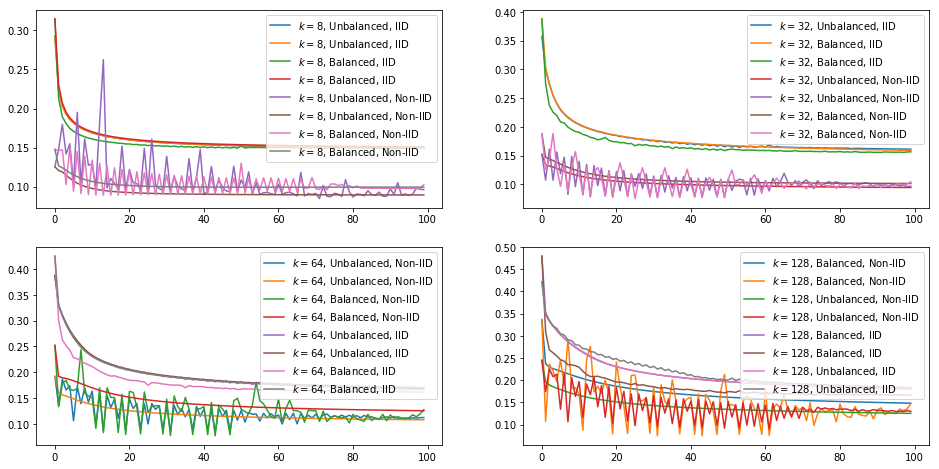

In [49]:
_, axes = plt.subplots(2, 2, figsize=(16, 8))
n_workers = ['8', '32', '64', '128']
for i, n_worker in enumerate(n_workers):
    scenarios = df.loc[df.Name.str.split('-').str[0] == n_worker, 'Name'].unique()
    # scenarios = df.loc[df.Name.str.contains(n_worker), 'Name'].unique()
    # _, ax = plt.subplots(1, 1, figsize=(16, 8))
    row = int(i / 2)
    col = i % 2
    for i, scenario in enumerate(scenarios):
        split = scenario.split('-')
        k = split[0]
        agg_mode = split[8]
        interval = int(split[9])
        iid = split[11]
        balanced = split[12]
        bal_str = 'Balanced' if balanced == '1' else 'Unbalanced'
        noniid_str = 'Non-IID' if iid == '1' else 'IID'
        if agg_mode == '0' and interval < 2:
            temp = df.query(f'Name == "{scenario}"')
            axes[row, col].plot(temp.loc[:, 'loss-master'], label=f'$k={k}$, {bal_str}, {noniid_str}')
            # if i == 20:
            #    break
    axes[row, col].legend()

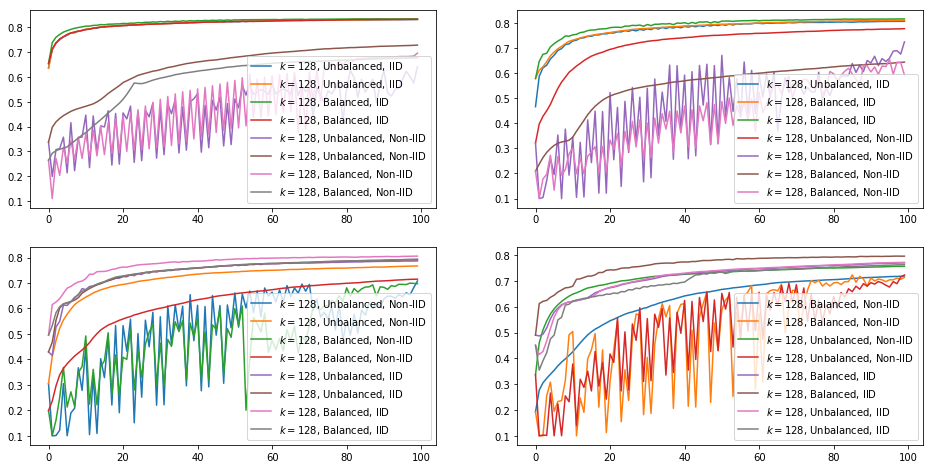

In [50]:
_, axes = plt.subplots(2, 2, figsize=(16, 8))
n_workers = ['8', '32', '64', '128']
for i, n_worker in enumerate(n_workers):
    scenarios = df.loc[df.Name.str.split('-').str[0] == n_worker, 'Name'].unique()
    # scenarios = df.loc[df.Name.str.contains(n_worker), 'Name'].unique()
    # _, ax = plt.subplots(1, 1, figsize=(16, 8))
    row = int(i / 2)
    col = i % 2
    for i, scenario in enumerate(scenarios):
        split = scenario.split('-')
        agg_mode = split[8]
        interval = int(split[9])
        iid = split[11]
        balanced = split[12]
        bal_str = 'Balanced' if balanced == '1' else 'Unbalanced'
        noniid_str = 'Non-IID' if iid == '1' else 'IID'
        if agg_mode == '0' and interval < 2:
            temp = df.query(f'Name == "{scenario}"')
            axes[row, col].plot(temp.loc[:, 'test-accuracy-master'], label=f'$k={k}$, {bal_str}, {noniid_str}')
            # if i == 20:
            #    break
    axes[row, col].legend()

### Mnist

In [38]:
dataset = 'mnist'
tf_dir = f"/Users/sashlinreddy/Downloads/masters/tf/{dataset}-latest/*"
list_output = (glob.glob(tf_dir))

m_df = load_events(list_output, keys, child_dir=f'master/{dataset}')

Skipping /Users/sashlinreddy/Downloads/masters/tf/mnist-latest/128-1-1-0-0-0.0-100-0.0-3-1-1-1-0/master/mnist


In [40]:
m_df.loc[:, 'Dataset'] = dataset

In [41]:
m_df.head()

,loss-master,msg-size,test-accuracy-master,train-accuracy-master,Name,Dataset
0,0.168357,4.647,0.8618,0.852267,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,mnist
1,0.150757,4.647,0.8793,0.870250,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,mnist
2,0.143810,4.647,0.8881,0.878317,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,mnist
3,0.140083,4.647,0.8924,0.883517,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,mnist
4,0.137791,4.647,0.8953,0.887233,32-1-1-0-0-0.0-100-0.0-1-20-0-0-0,mnist


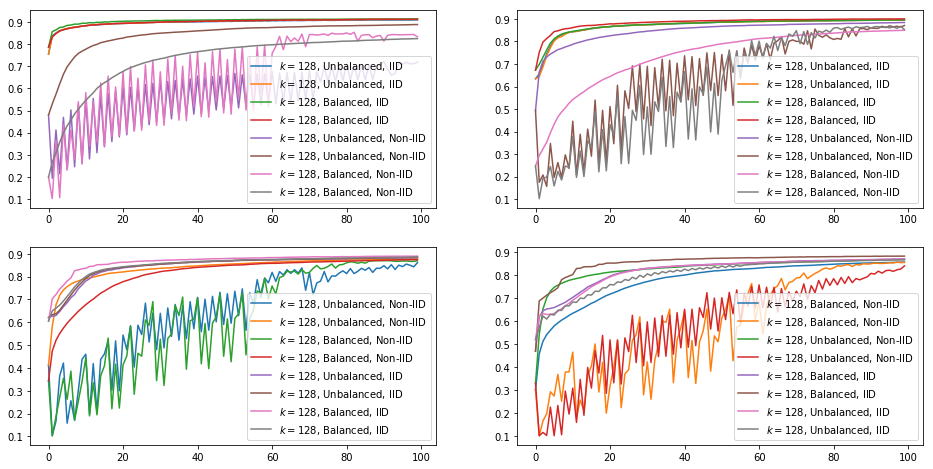

In [51]:
_, axes = plt.subplots(2, 2, figsize=(16, 8))
n_workers = ['8', '32', '64', '128']
for i, n_worker in enumerate(n_workers):
    scenarios = m_df.loc[m_df.Name.str.split('-').str[0] == n_worker, 'Name'].unique()
    # scenarios = df.loc[df.Name.str.contains(n_worker), 'Name'].unique()
    # _, ax = plt.subplots(1, 1, figsize=(16, 8))
    row = int(i / 2)
    col = i % 2
    for i, scenario in enumerate(scenarios):
        split = scenario.split('-')
        agg_mode = split[8]
        interval = int(split[9])
        iid = split[11]
        balanced = split[12]
        bal_str = 'Balanced' if balanced == '1' else 'Unbalanced'
        noniid_str = 'Non-IID' if iid == '1' else 'IID'
        if agg_mode == '0' and interval < 2:
            temp = m_df.query(f'Name == "{scenario}"')
            axes[row, col].plot(temp.loc[:, 'test-accuracy-master'], label=f'$k={k}$, {bal_str}, {noniid_str}')
            # if i == 20:
            #    break
    axes[row, col].legend()

In [110]:
scenario_df = m_df.Name.str.split('-', expand=True)
scenario_df.columns = [
    "n_workers", "scenario", "remap", "quantize",
    "send_gradients", "mu_g", "n_most_rep", "overlap",
    "aggregate_mode", "interval", "mode", "noniid",
    "unbalanced"
]
mu_df = pd.concat([m_df, scenario_df], axis=1)
mu_df.n_workers = mu_df.n_workers.astype(int)
mu_df.interval = mu_df.interval.astype(int)

In [111]:
packet_size_piv = (
    mu_df.query("aggregate_mode == '0'")
    .pivot_table(
        values="msg-size", index="n_workers", columns=["mode", "interval"]
    )
)
packet_size_piv
# .plot(kind="bar")

mode                0                                               1
interval          1          10         20     50     100         1  
n_workers                                                            
8           20.985001   2.099000   1.049000  0.420  0.210   13.543000
32          92.933998   9.293000   4.647000  1.859  0.929   60.699249
64         188.865997  18.886999   9.443000  3.777  1.889  119.278002
128        380.730011  38.073002  19.037001  7.615  3.807  235.752754

In [119]:
packet_size_piv.columns = [
    r'FedAvg, $\rho=1$', r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$', r'DynAvg SVD'
]
packet_size_piv.index.name = 'No. of workers'

### Fashion Mnist

In [121]:
sf_df = df.Name.str.split('-', expand=True)
sf_df.columns = [
    "n_workers", "scenario", "remap", "quantize",
    "send_gradients", "mu_g", "n_most_rep", "overlap",
    "aggregate_mode", "interval", "mode", "noniid",
    "unbalanced"
]
fm_df = pd.concat([df, sf_df], axis=1)
fm_df.n_workers = fm_df.n_workers.astype(int)
fm_df.interval = fm_df.interval.astype(int)

In [122]:
packet_size_f_piv = (
    fm_df.query("aggregate_mode == '0'")
    .pivot_table(
        values="msg-size", index="n_workers", columns=["mode", "interval"]
    )
)
packet_size_f_piv
# .plot(kind="bar")

mode                0                                               1
interval          1          10         20     50     100         1  
n_workers                                                            
8           20.985001   2.099000   1.049000  0.420  0.210   16.106000
32          92.933998   9.293000   4.647000  1.859  0.929   62.775750
64         188.865997  18.886999   9.443000  3.777  1.889  116.527500
128        380.730011  38.073002  19.037001  7.615  3.807  226.286995

In [123]:
packet_size_f_piv.columns = [
    r'FedAvg, $\rho=1$', r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
    r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$', r'DynAvg SVD'
]
packet_size_f_piv.index.name = 'No. of workers'

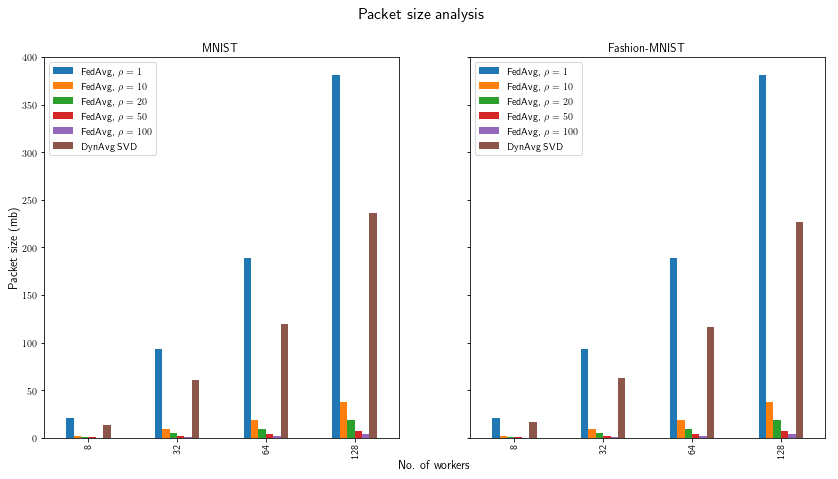

In [139]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14, 7))
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# Mnist
packet_size_piv.plot(kind='bar', ax=axes[0])
axes[0].set_title('MNIST', fontdict=dict(fontsize=12))
axes[0].set_xlabel('')
# Fashion Mnist
packet_size_f_piv.plot(kind='bar', ax=axes[1])
axes[1].set_title('Fashion-MNIST', fontdict=dict(fontsize=12))
axes[1].set_xlabel('')

plt.suptitle('Packet size analysis', fontsize=16)
plt.xlabel('No. of workers', fontdict=dict(fontsize=12))
plt.ylabel('Packet size (mb)', fontdict=dict(fontsize=12))
plt.savefig('../reports/figures/packet-size-analysis.png', dpi=500, format='png')